In [31]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [32]:
(X_train, y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [33]:
len(X_train)

60000

In [34]:
X_train[0].shape

(28, 28)

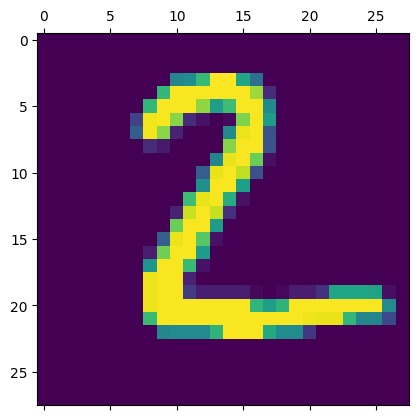

In [48]:
plt.matshow(X_test[1])

In [36]:
X_train=X_train/255
X_test=X_test/255 #model scaling

In [37]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [38]:
X_train_flattened.shape

(60000, 784)

In [45]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')

])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4631 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3033 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2830 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2728 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9261


In [73]:
y_predicted=model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 1s 2ms/step


array([6.2201858e-02, 2.2897168e-01, 9.9993479e-01, 3.6450397e-02,
       1.9595436e-09, 8.1176348e-02, 4.2370014e-04, 3.1285673e-08,
       4.6535555e-02, 3.2026463e-05], dtype=float32)

In [74]:
np.argmax(y_predicted[1])

2

In [75]:
y_predicted_labels=[np.argmax(i) for i in y_predicted ]

In [76]:
y_predicted_labels[:5]


[7, 2, 1, 0, 4]

In [77]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [78]:
cm =tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [70]:
import seaborn as sn

Text(95.72222222222221, 0.5, 'truth')

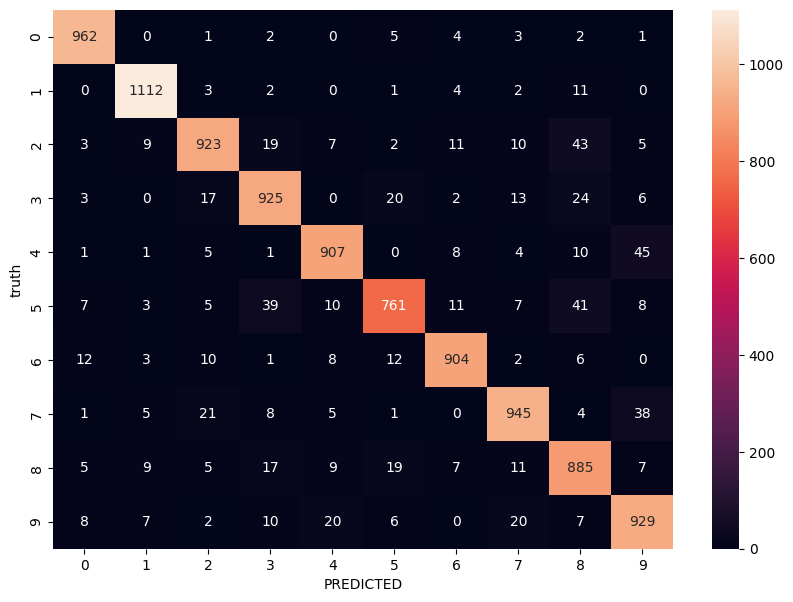

In [59]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('PREDICTED')
plt.ylabel('truth')

WITH HIDDEN LAYERS

In [72]:
model=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2724 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1238 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0870 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0657 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0515 - accuracy: 0.9843


Text(95.72222222222221, 0.5, 'truth')

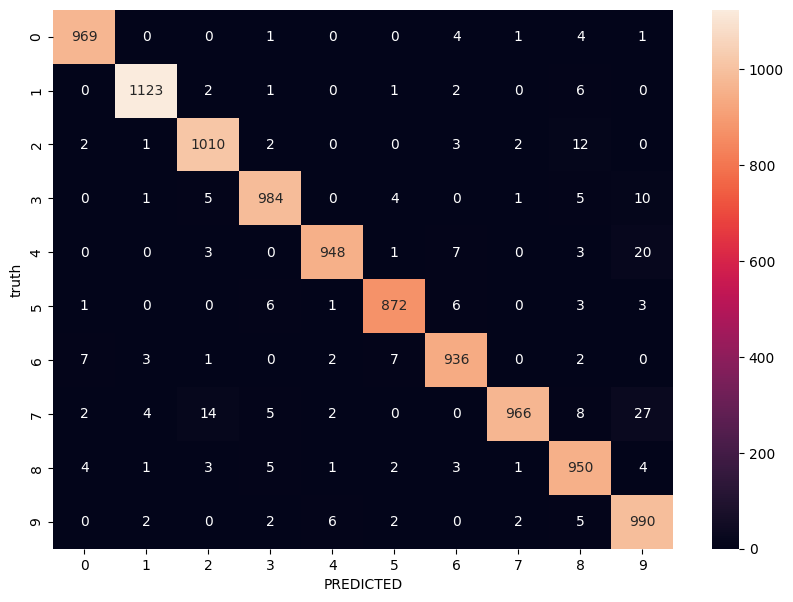

In [79]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('PREDICTED')
plt.ylabel('truth')